Implement Support Vector Machines (SVM) to classify sentiments toward the COVID-19
pandemic (using Twitter data)



In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [5]:
#reading data
data=pd.read_csv("/content/COVIDSenti-A.csv")
data

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


EDA

In [6]:
data.shape

(30000, 2)

In [7]:
#columns
data.columns

Index(['tweet', 'label'], dtype='object')

In [8]:
#checking for null values
data.isnull().sum()

tweet    0
label    0
dtype: int64

In [9]:
data.duplicated().sum()

13

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(29987, 2)

In [12]:
#Visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

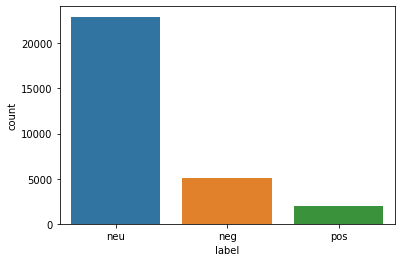

In [13]:
sns.countplot(x="label", data=data)
plt.show()

Data Preprocessing

In [14]:

!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.3 MB/s 


In [15]:
#preprocesssing
import re
from nltk.corpus import stopwords
from unidecode import unidecode
from nltk.tokenize import word_tokenize



In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
stop_words = set(stopwords.words('english'))
stop_words.add('https')
for i in data.index:
  data['tweet'][i]=re.sub('[@#&?-?><=!`\-:,()|]',' ',data['tweet'][i])
  word_tokens = word_tokenize(data['tweet'][i])
  filtered_sentence = [w.lower() for w in word_tokens if not w.lower() in stop_words and not (w.startswith('https://') or w.startswith('//') )]
  filtered_sentence=[unidecode(w) for w in filtered_sentence]
  data['tweet'][i]=(' '.join(filtered_sentence))

Train Test Split

In [18]:
#splitting data frame into x and y
x=data["tweet"]
y=data["label"]

In [19]:
#splitting data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=63)

In [20]:
x_train

18407    china 's locked coronavirus city grocery deliv...
22218    another 44 people cruise ship tested positive ...
6120     concerns around economic impact coronavirus sp...
17043    realdonaldtrump trippy tweet closely following...
14377    bp says coronavirus could wipe third oil deman...
                               ...                        
2387     two suspected coronavirus infected individuals...
25827    read latest abu_hq plans dbs2020 precautions c...
139               corona virus ton soup banned u.s. .. uou
11381    bat eaters dropping like flies . banchinatrave...
5165                                     corona virus fuck
Name: tweet, Length: 20990, dtype: object

In [21]:
x_test

26335    coronavirus explainedwhat u need know new chin...
442           coronavirus cure treat coronavirus dangerous
12116    nomeat_nocoronavirus world vagetarian corona v...
5794                             please read . coronavirus
3592            fourth case wuhan coronavirus confirmed us
                               ...                        
3479     third us coronavirus case confirmed california...
13220                      coronavirus surgicalmaskoptions
5492     ancalerts afp check summary novel coronavirus ...
17777        `` us citizen died coronavirus nyt reports ''
21725    coronavirus spreads ship princess cruises offe...
Name: tweet, Length: 8997, dtype: object

Implementing SVC

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)

In [23]:

#linear kernel
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(train_vectors,y_train)

SVC(kernel='linear')

In [24]:
pred_linear=clf.predict(test_vectors)
from sklearn import metrics
metrics.accuracy_score(y_test,pred_linear)

0.8852950983661221

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_linear))

              precision    recall  f1-score   support

         neg       0.85      0.71      0.77      1488
         neu       0.90      0.96      0.93      6921
         pos       0.75      0.40      0.53       588

    accuracy                           0.89      8997
   macro avg       0.83      0.69      0.74      8997
weighted avg       0.88      0.89      0.88      8997

